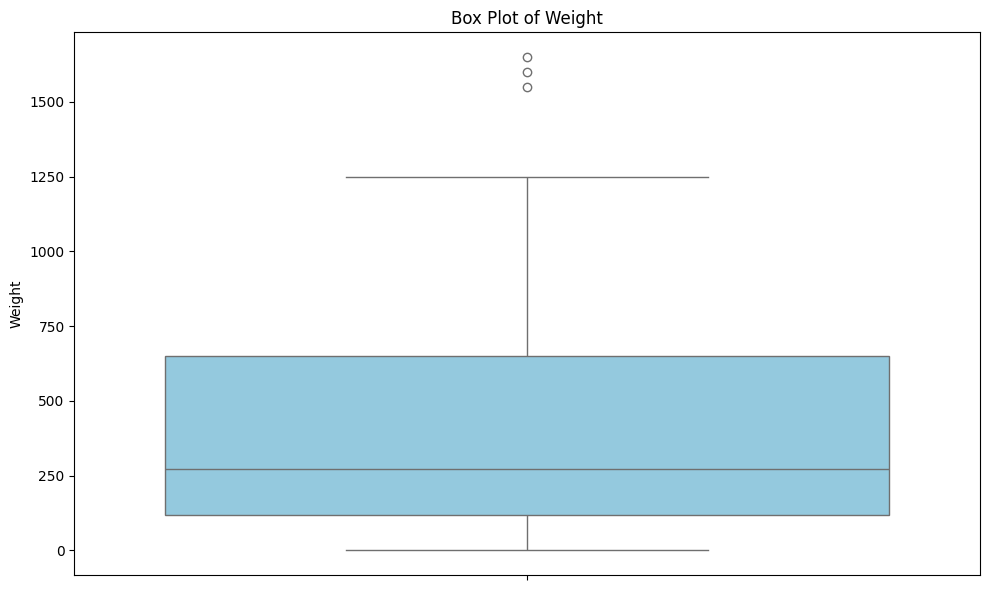

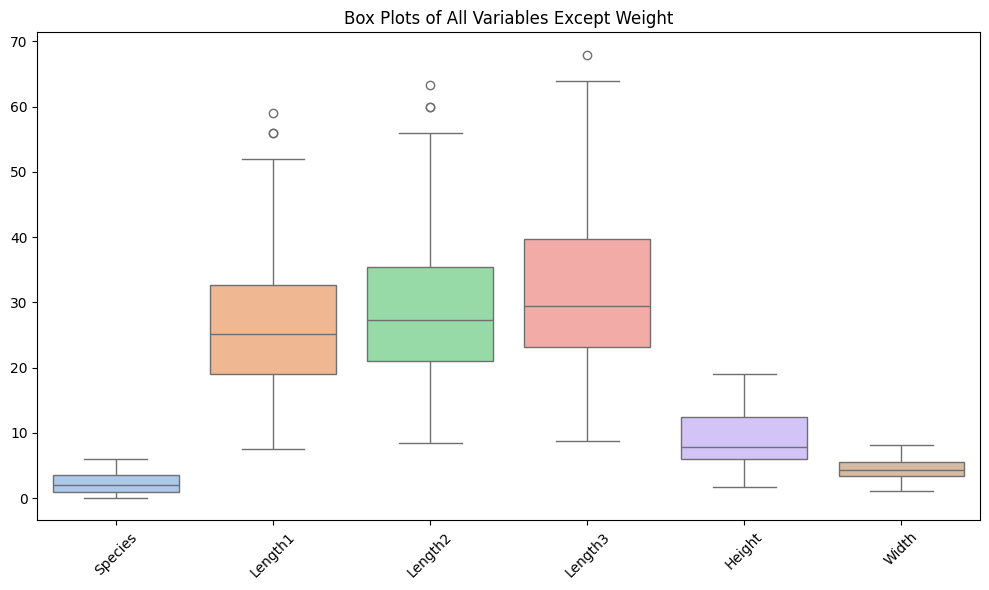

<Figure size 1400x800 with 0 Axes>

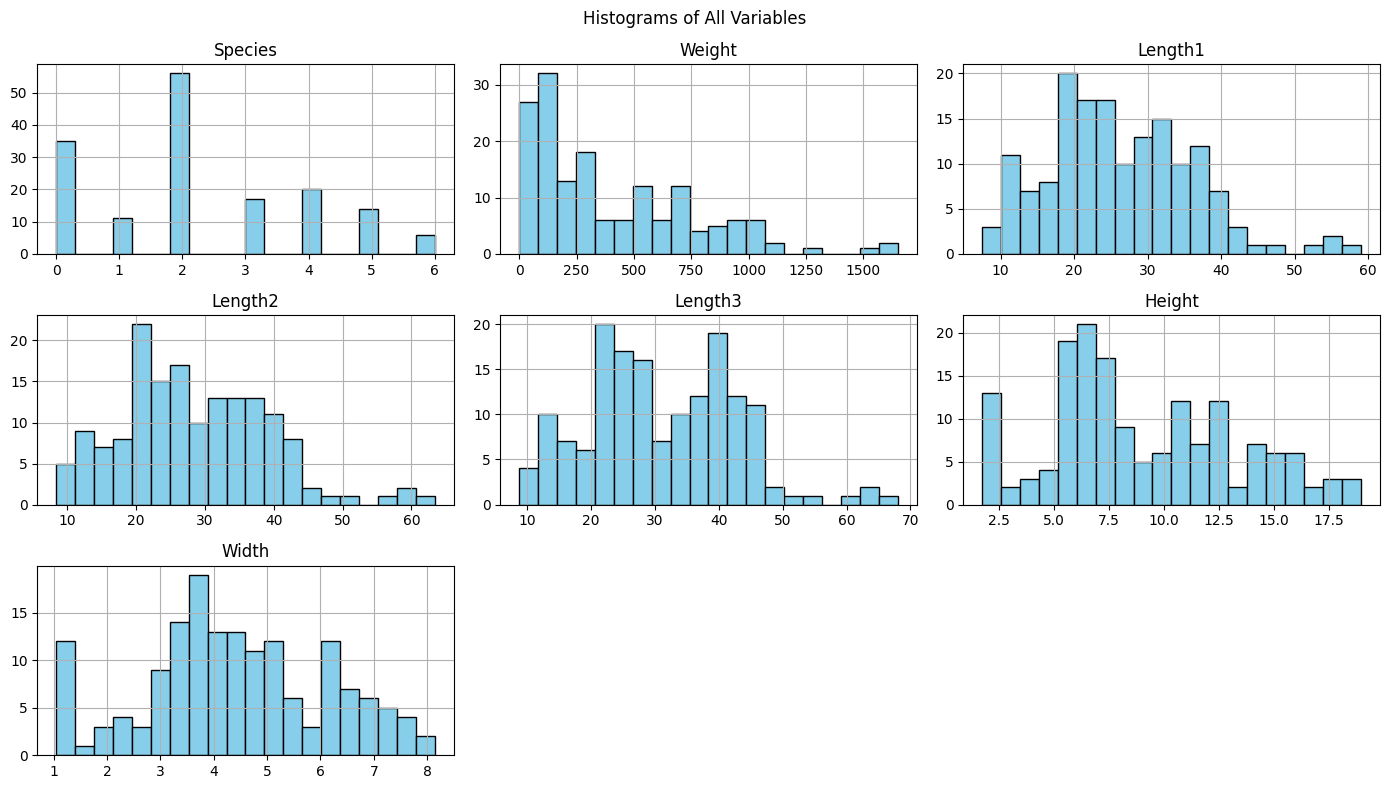

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\dixit\DURHAM\ArtificialIntelligence\Semester 2\AIDI 2004\Week 12\Lab4\data\Fish.csv'
fish_data = pd.read_csv(file_path)

# Define the features and target variables
features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
target_regression = 'Weight'
target_classification = 'Species'

# Encode the species labels
le = LabelEncoder()
fish_data[target_classification] = le.fit_transform(fish_data[target_classification])

# Split the data into training and testing sets
X = fish_data[features]
y_regression = fish_data[target_regression]
y_classification = fish_data[target_classification]

X_train, X_test, y_train_regression, y_test_regression = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train, X_test, y_train_classification, y_test_classification = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train the Linear Regression model for regression
reg_model = LinearRegression()
reg_model.fit(X_train, y_train_regression)

# Define and train the Logistic Regression model for classification
log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(X_train, y_train_classification)

# Define and train the Random Forest model for classification
clf_model = RandomForestClassifier()
clf_model.fit(X_train, y_train_classification)

# Save the models
joblib.dump(reg_model, 'linear_regression_model.pkl')
joblib.dump(log_reg_model, 'logistic_regression_model.pkl')
joblib.dump(clf_model, 'random_forest_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the label encoder
joblib.dump(le, 'label_encoder.pkl')

# Generate and save the box plots and histograms
# Box plot of weight
plt.figure(figsize=(10, 6))
sns.boxplot(y=fish_data['Weight'], color='skyblue')
plt.title('Box Plot of Weight')
plt.tight_layout()
plt.savefig('box_plot_weight.png')

# Box plots of all other variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=fish_data.drop(columns=['Weight']), palette='pastel')
plt.title('Box Plots of All Variables Except Weight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('box_plots_other.png')

# Histograms of all variables
plt.figure(figsize=(14, 8))
fish_data.hist(figsize=(14, 8), bins=20, edgecolor='black', color='skyblue')
plt.suptitle('Histograms of All Variables')
plt.tight_layout()
plt.savefig('histograms.png')
